In [1]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
import pickle
from scipy.optimize import fsolve
from multiprocessing import Pool
from collections import ChainMap
%matplotlib inline  
import FatTreeLibrary as ft

In [2]:
SP=pickle.load( open( "../../../AllShortestPaths/allShortestPathsK16.pkl", "rb" ) )

In [3]:
ftree=ft.getFatTree(16)

In [4]:
servers=ftree[1]
links=ftree[0]
demands=ft.getDemands(100,1000,servers)

In [81]:
routing=ft.ECMPFromDict(demands,SP)

In [82]:
routingLinks=np.array([ft.nodesToLinksIndexes(r,links) for r in routing])

In [83]:
C=np.array([10 for l in links])
CUsed=np.array([0. for l in links])

In [84]:
rates=ft.max_min_allocation(C,routingLinks)

In [85]:
time_to_completion=demands[:,2]/rates

In [86]:

for i in range(len(routingLinks)):
    path=routingLinks[i]
    rate=rates[i]
    CUsed[path]+=rate

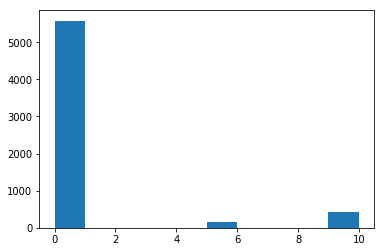

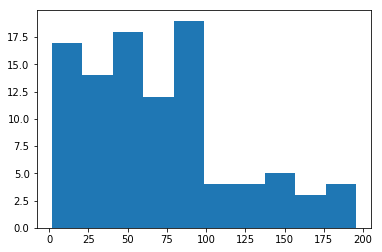

In [87]:
plt.hist(CUsed)
plt.show()
plt.hist(time_to_completion)
plt.show()

In [73]:
demands=ft.getDemands(10,100,servers)
routing=ft.ECMPFromDict(demands,SP)
routingLinks=[ft.nodesToLinksIndexes(r,links) for r in routing]

In [74]:
C=np.array([10. for x in links])

In [47]:
rates=ft.max_min_allocation(C,routingLinks)

In [48]:
rates

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [145]:
ind=np.array([i for i in range(len(demands))])
activeIndexes=ind[ind!=-1]
activeIndexes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [146]:
demands

array([[474, 465,   2],
       [846, 421,   6],
       [753, 895,   3],
       [772, 287,   2],
       [359, 310,  23],
       [518, 719,  30],
       [ 24, 495,   6],
       [835, 980,   4],
       [414, 256,   4],
       [434, 273,   7]])

In [49]:
x=demands[:,2]/rates
print (x)

[0.5 0.2 6.6 0.1 1.7 0.  0.2 4.3 2.9 4.3]


In [87]:
def completionTimes(demands,routingLinks,C):
    demands=np.array(demands)
    routingLinks=list(routingLinks)
    times=np.zeros(len(demands))
    ind=np.arange(len(demands))
    activeIndexes=ind[ind!=-1]
    time_to_completion=np.zeros(len(demands))
    rates=ft.max_min_allocation(C,routingLinks)
    #print (demands[:,-1])
    while np.sum(ind)>-len(ind):
        time_to_completion[activeIndexes]=demands[activeIndexes,2]/rates[activeIndexes]
        minT=min(time_to_completion[activeIndexes])
        times[activeIndexes]+=minT
        demands[activeIndexes,2]=demands[activeIndexes,2]-rates[activeIndexes]*minT
        ind[time_to_completion==minT]=-1
        activeIndexes=ind[ind!=-1]
        routingLinks_=[routingLinks[i] for i in activeIndexes]#max_min_allocation wants 'paths' as list
        rates_=ft.max_min_allocation(C,routingLinks_)
        rates[activeIndexes]=rates_
        #print (demands[:,-1])
    return times

In [88]:
demands=ft.getDemands(1000,100,servers)
routing=ft.ECMPFromDict(demands,SP)
routingLinks=[ft.nodesToLinksIndexes(r,links) for r in routing]

In [89]:
t=completionTimes(demands,routingLinks,C)

In [90]:
t

array([ 2.07515152,  9.03765152, 12.42098485,  0.26      ,  3.72931818,
        4.67931818,  9.93765152,  3.72931818, 11.07098485,  6.56265152,
        6.36265152,  7.46265152,  1.49333333,  3.82931818,  6.36265152,
        5.66265152, 11.27098485,  8.33765152,  3.22931818,  1.49333333,
        3.72931818, 12.82098485,  8.83765152, 11.37098485,  7.56265152,
        1.12666667,  6.86265152,  0.72666667,  8.48765152,  0.1       ,
        7.78765152, 10.77098485,  9.03765152, 11.92098485, 10.47098485,
        7.46265152,  8.93765152, 11.37098485,  5.86265152, 10.33765152,
       10.77098485, 12.42098485,  7.66265152,  5.02931818,  6.16265152,
        2.76181818, 11.67098485, 12.42098485,  8.48765152,  9.53765152,
        7.46265152,  4.47931818,  4.67931818,  8.48765152, 10.77098485,
       11.27098485,  8.83765152,  4.02931818,  1.49333333, 13.32098485,
       10.23765152,  2.34181818,  7.66265152,  1.49333333,  8.68765152,
        8.13765152,  9.43765152,  4.82931818, 12.82098485,  2.07

In [115]:
(1-d)==1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [114]:
d

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])